## Visualizing the Impact of Missing Variables
Visualizing the impact of missing variables is an important step in understanding data quality and its potential impact on analyses. Here are some common methods and examples to visualize missing data using pandas, seaborn, and other useful libraries like missingno.

### Bar Plot of Missing Values

You can create a bar plot to visualize the number of missing values in each column using pandas and matplotlib.

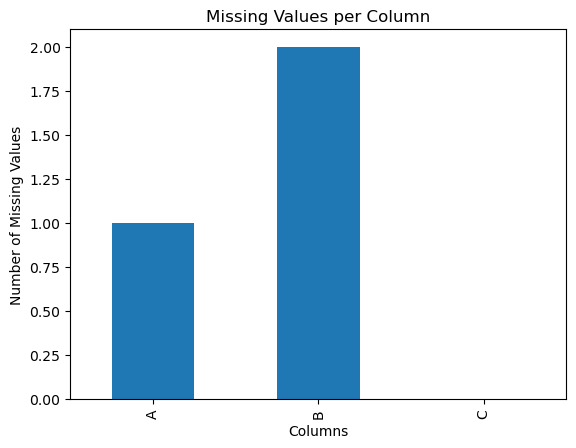

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame
data = pd.DataFrame({
    'A': [1, 2, None, 4, 5],
    'B': [None, 2, 3, None, 5],
    'C': [1, 2, 3, 4, 5]
})

# Calculate missing values
missing_values = data.isnull().sum()

# Bar plot
missing_values.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.title('Missing Values per Column')
plt.show()

### Heatmap of Missing Values

Using seaborn, you can create a heatmap to visualize the pattern of missing data.

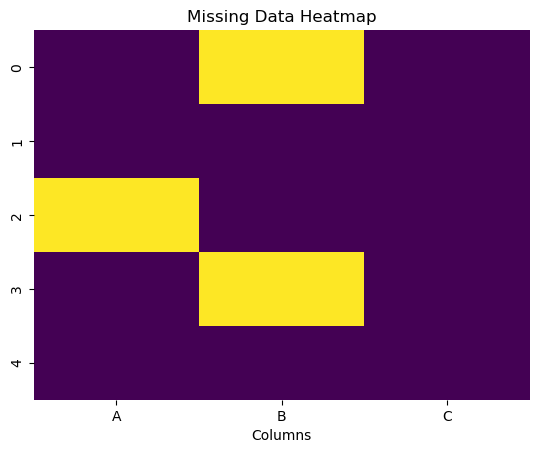

In [13]:
import seaborn as sns

# Heatmap of missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.xlabel('Columns')
plt.title('Missing Data Heatmap')
plt.show()


### Matrix Plot using missingno

The missingno library provides a simple way to visualize missing data.

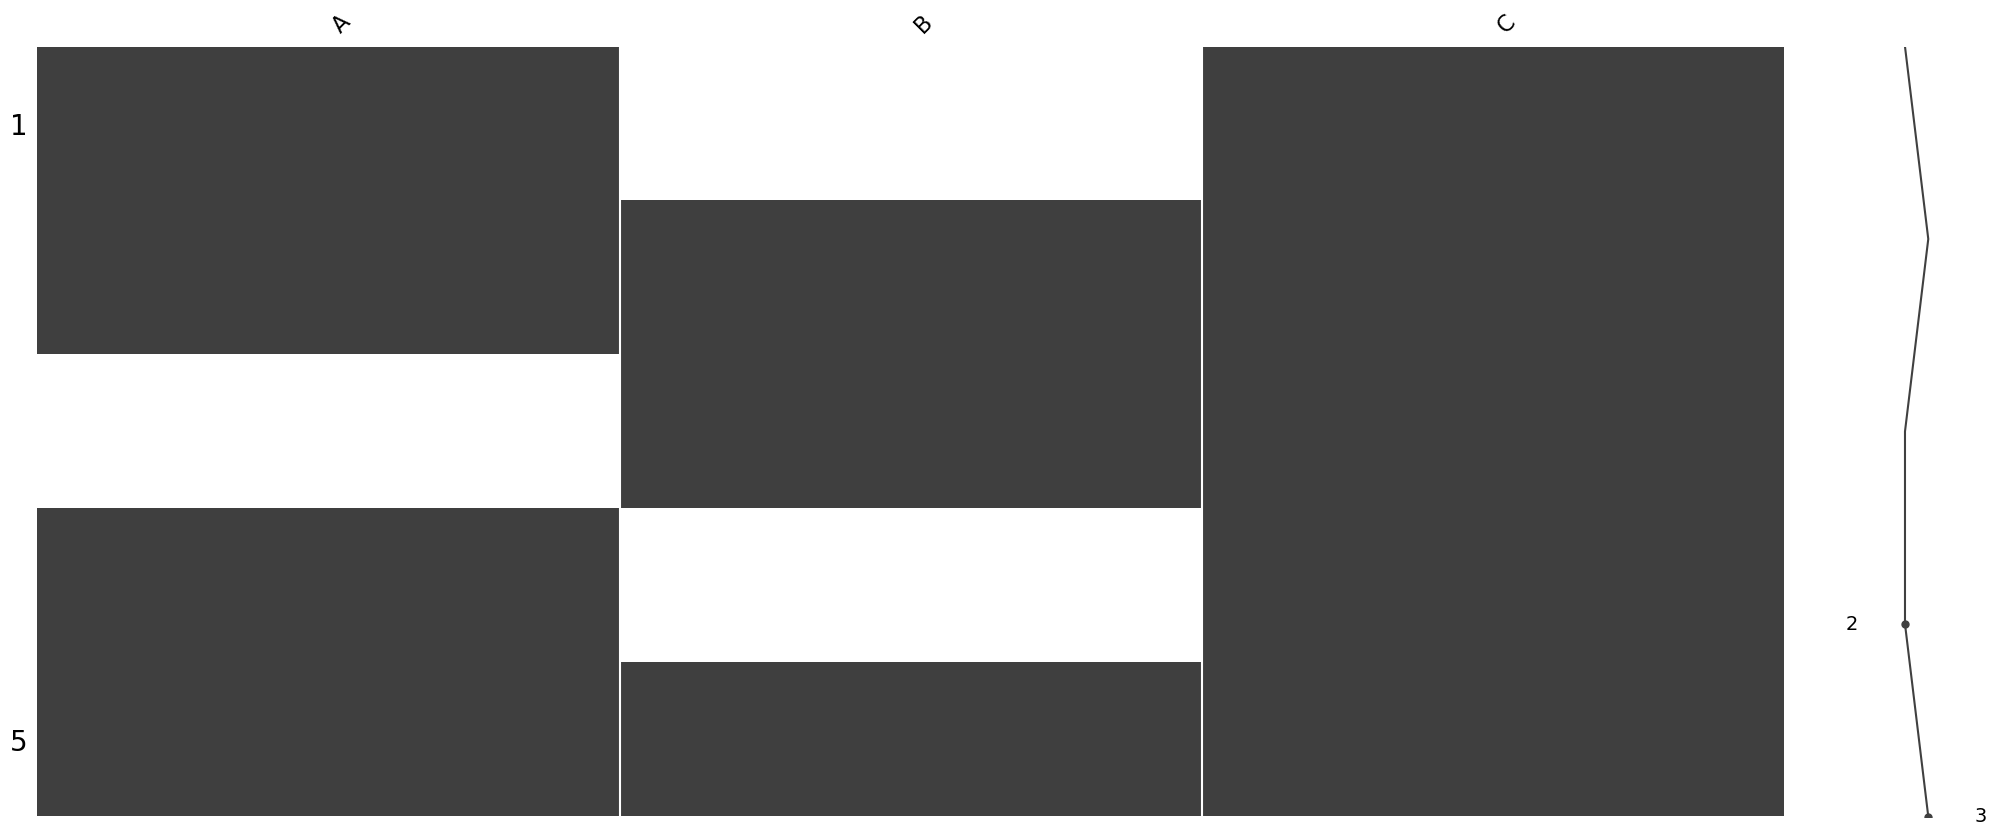

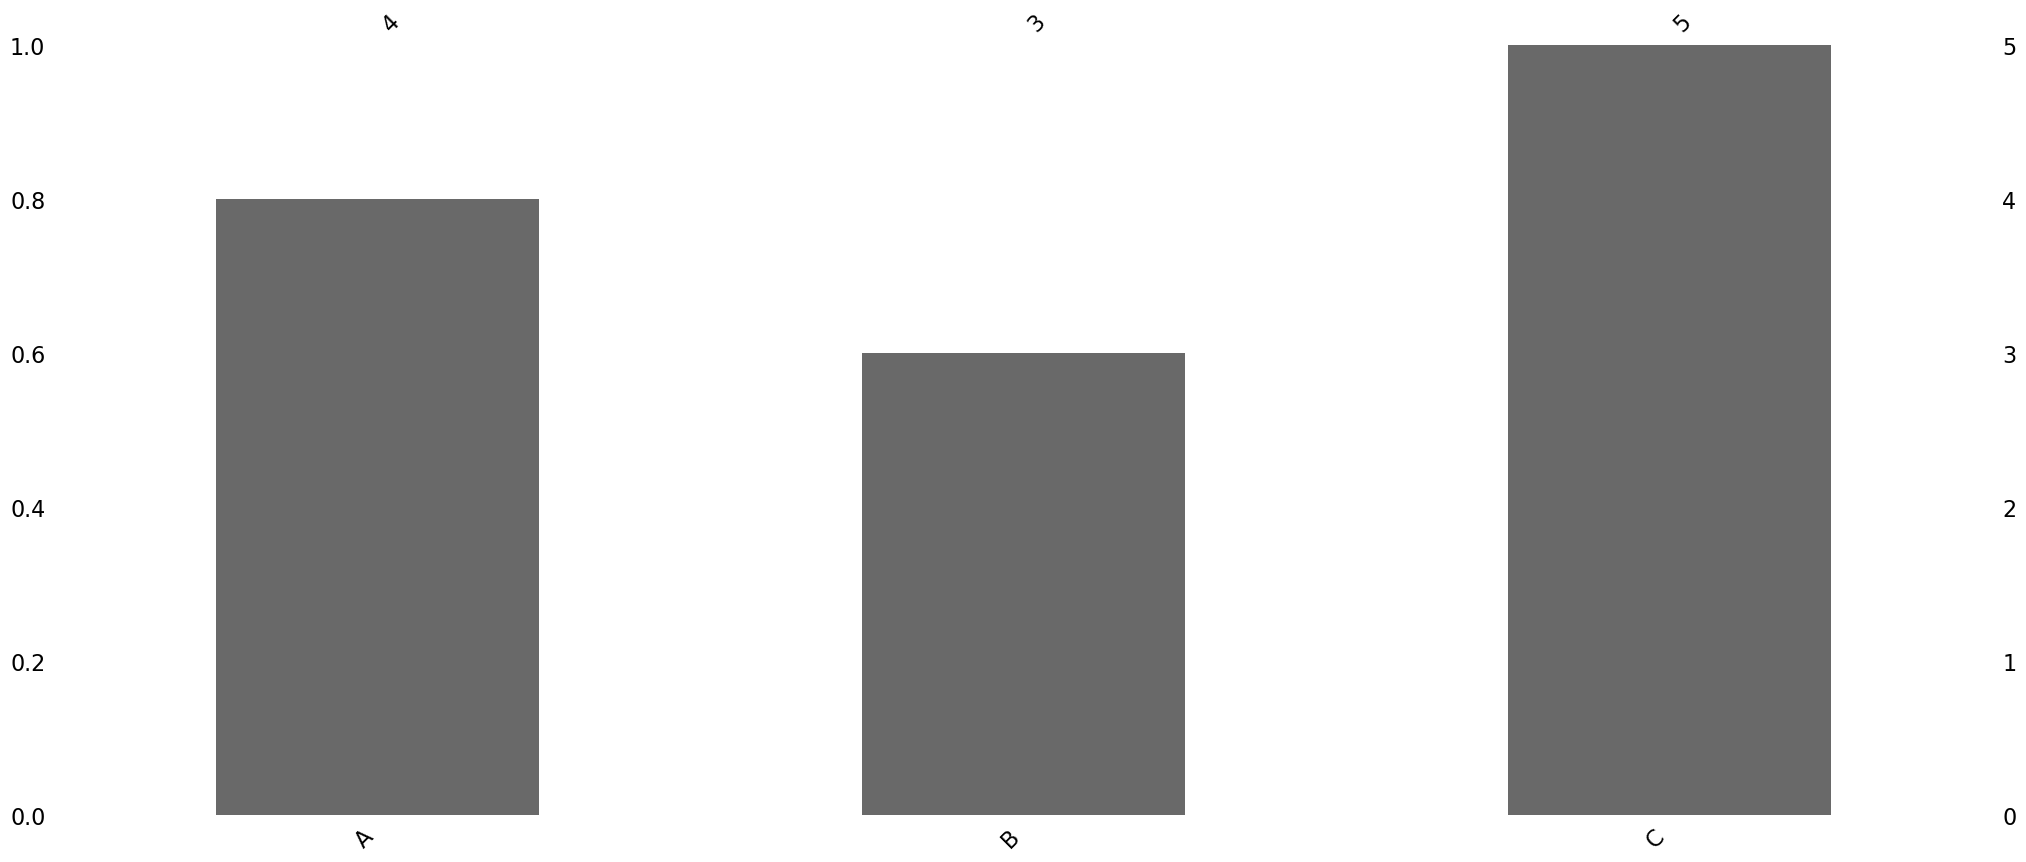

In [14]:
#!pip3 install missingno
import missingno as msno

# Matrix plot
msno.matrix(data)
plt.show()

# Bar plot
msno.bar(data)
plt.show()


### Dendrogram
Using missingno to create a dendrogram can help understand the hierarchical clustering of missing data.

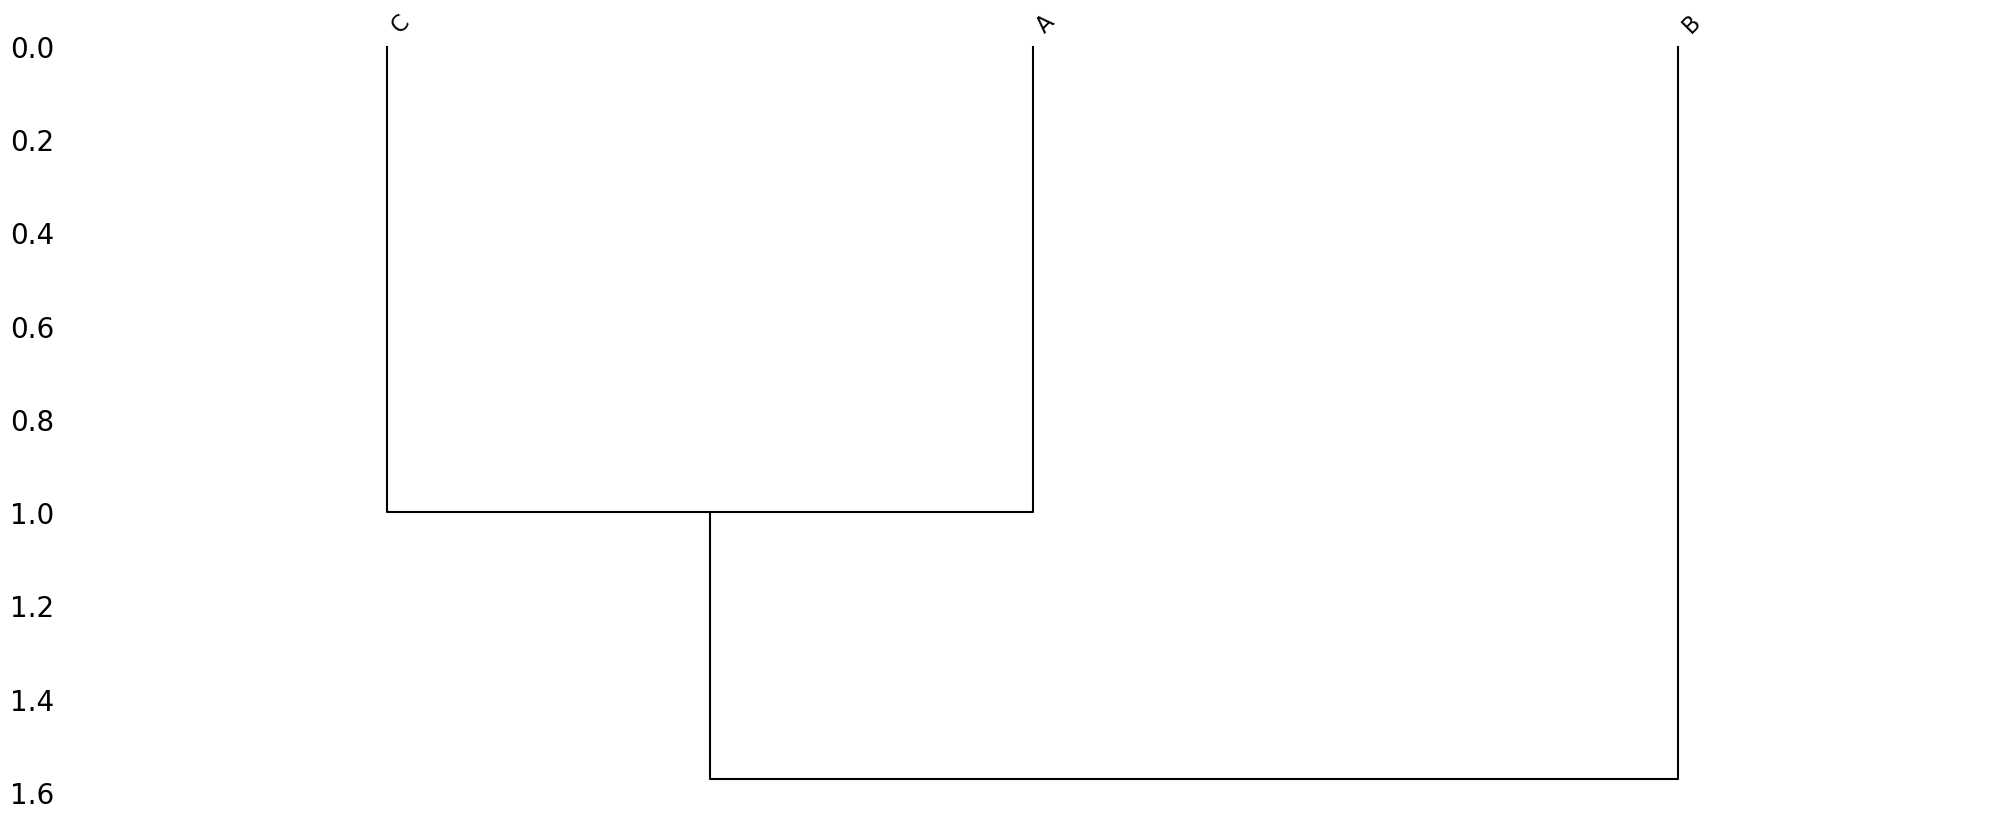

In [7]:
# Dendrogram
msno.dendrogram(data)
plt.show()


### Correlation Heatmap of Missing Values
You can also visualize the correlation between missing values in different columns.

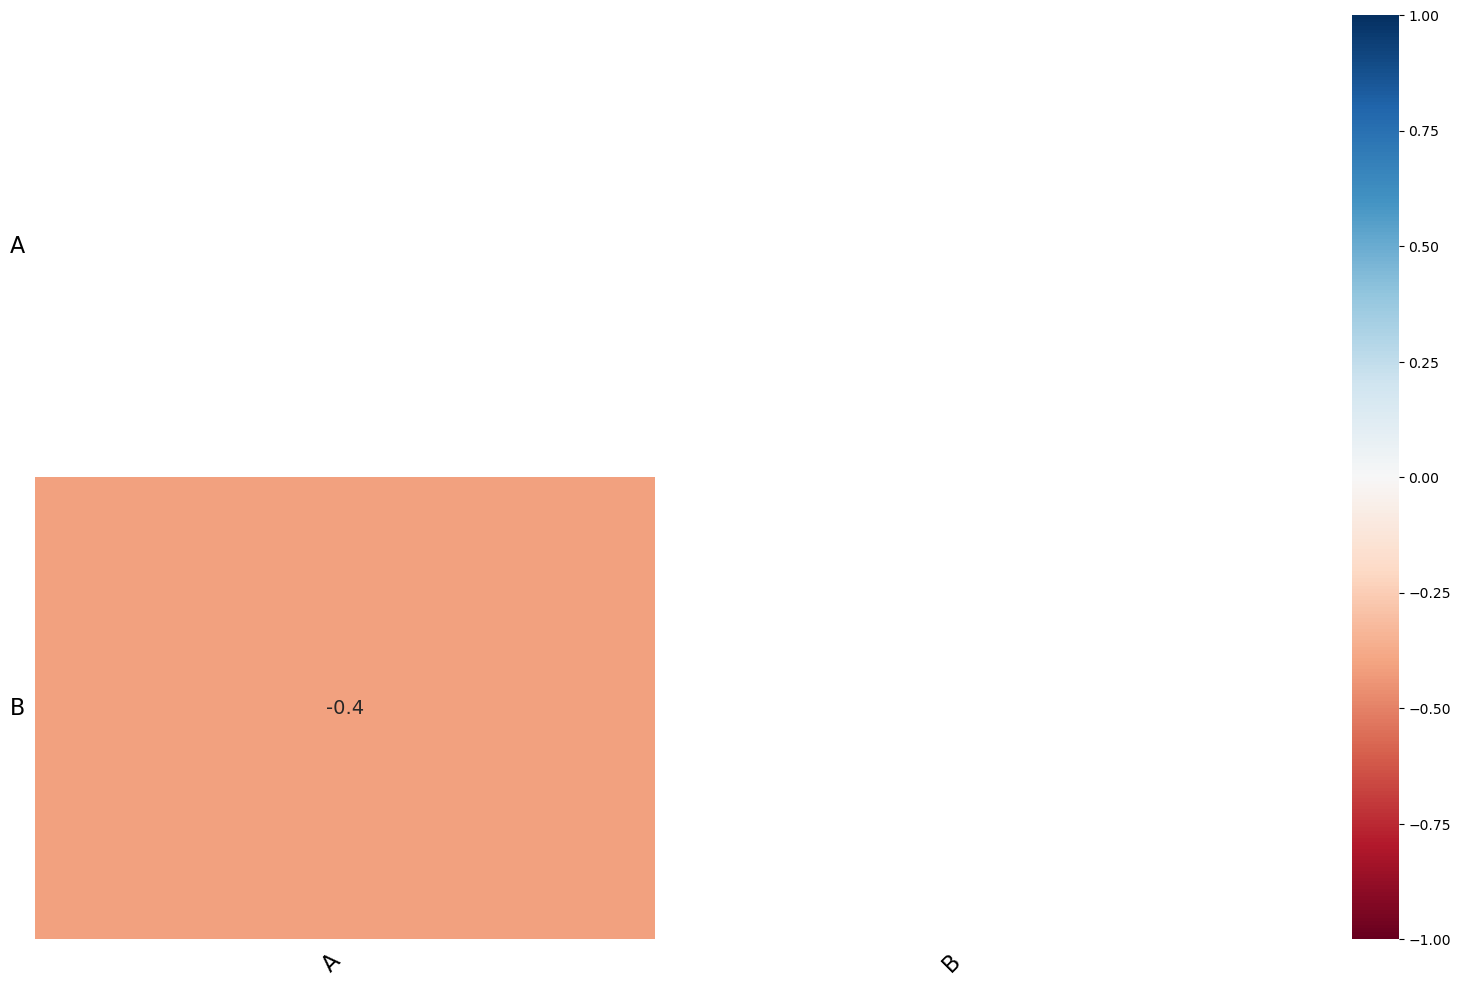

In [15]:
# Correlation heatmap
msno.heatmap(data)
plt.show()


### Correlation Heatmap with seaborn

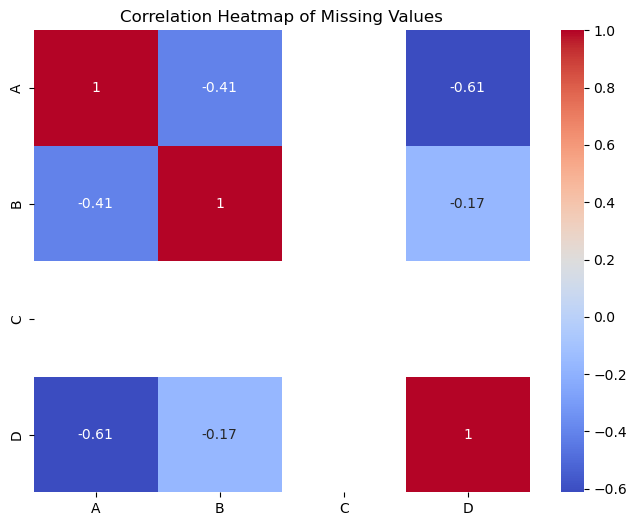

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = pd.DataFrame({
    'A': [1, 2, None, 4, 5],
    'B': [None, 2, 3, None, 5],
    'C': [1, 2, 3, 4, 5],
    'D': [None, None, 3, 4, None]
})

# Create a DataFrame indicating missing values
missing_data = data.isnull().astype(int)

# Compute the correlation matrix
corr_matrix = missing_data.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap of Missing Values')
plt.show()

### Impact of Missing Values on Distribution

To visualize the impact of missing values on the distribution of other variables, you can use seaborn to create plots that compare the distributions of variables when missing values are present or absent in another variable. One effective way to do this is by using seaborn's FacetGrid or boxplot and violinplot.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample DataFrame
data = pd.DataFrame({
    'A': [1, 2, None, 4, 5, 6, 7, 8, 9, 10],
    'B': [None, 2, 3, None, 5, 6, 7, None, 9, 10],
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
})

# Create a new column indicating missing values in column 'B'
data['B_missing'] = data['B'].isnull()


**Plot Distributions Using FacetGrid**

* Use FacetGrid to visualize the impact of missing values in column B on the distribution of column A.
* sns.FacetGrid is used to create a grid of histograms for column A, separated by the presence or absence of missing values in column B.
* g.map(sns.histplot, "A", kde=True) maps a histogram plot to each facet, with a Kernel Density Estimate (KDE) overlay to visualize the distribution.

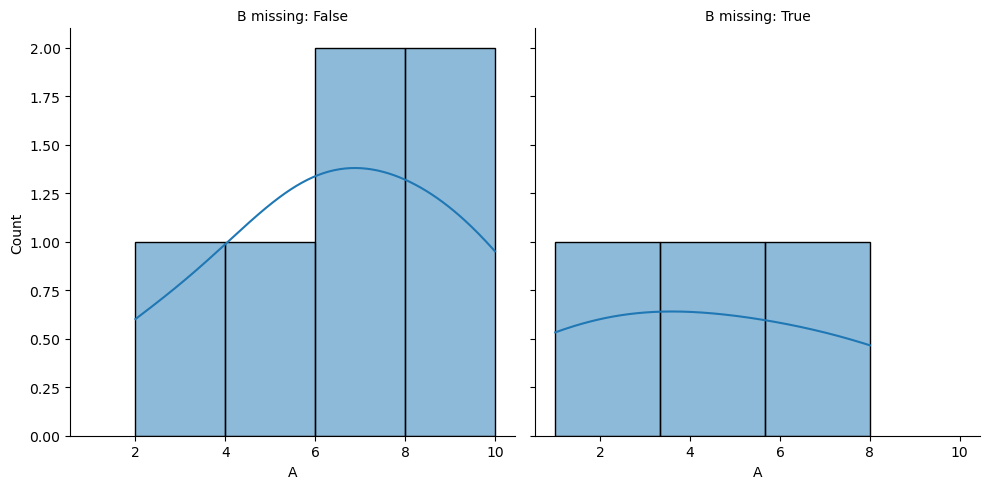

In [18]:
# Using FacetGrid to compare distributions
g = sns.FacetGrid(data, col="B_missing", height=5)
g.map(sns.histplot, "A", kde=True)
g.set_titles(col_template="B missing: {col_name}")
g.set_axis_labels("A", "Count")
plt.show()


**Plot Distributions Using boxplot and violinplot**

* Use boxplot and violinplot to compare distributions
* sns.boxplot creates boxplots of column A, separated by the presence or absence of missing values in column B.
* sns.violinplot creates violin plots of column A, providing a more detailed view of the distribution and its density.

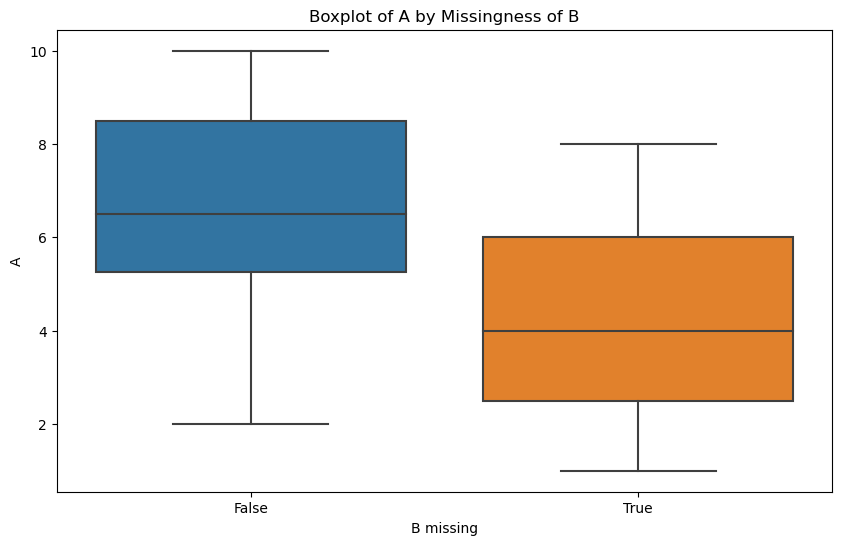

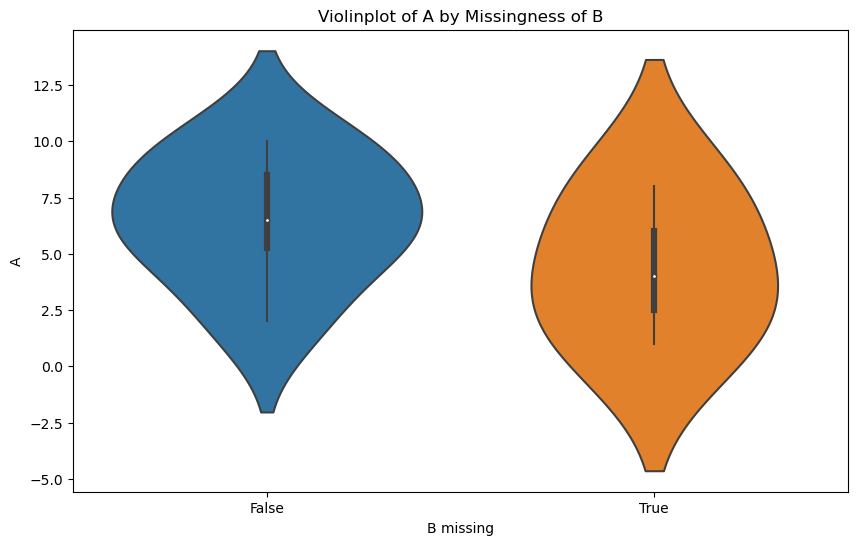

In [19]:
# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='B_missing', y='A', data=data)
plt.xlabel('B missing')
plt.ylabel('A')
plt.title('Boxplot of A by Missingness of B')
plt.show()

# Violinplot
plt.figure(figsize=(10, 6))
sns.violinplot(x='B_missing', y='A', data=data)
plt.xlabel('B missing')
plt.ylabel('A')
plt.title('Violinplot of A by Missingness of B')
plt.show()
